In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))

In [196]:
def plot_clusters(points, cluster_labels,labels=None,offset = 0.01,show_annotations = True,are_centers = False):
    uncluster_labels = np.unique(cluster_labels)
    alpha = 1
    if labels == None:
        labels = np.arange(points.shape[0])
    
    for label in uncluster_labels:
        if are_centers:
            alpha = 0.5
        plt.scatter(points[cluster_labels == label,0],points[cluster_labels == label,1],label=label,alpha=alpha)
    if show_annotations:
        for x in range(points.shape[0]):
            plt.annotate(labels[x],(points[x,0]+offset,points[x,1]+offset))
    plt.legend()

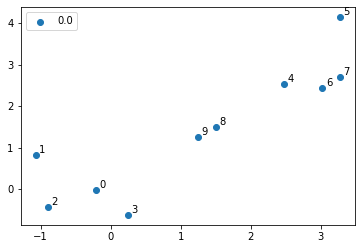

In [175]:
cluster_labels = np.zeros(10).tolist()
offset = 0.05
plot_clusters(points,cluster_labels,offset=0.05)
plt.show()

In [55]:
cluster_labels = np.zeros(10).tolist()
offset = 0.05
while True:
    x = input('<points>-<label>')
    if x == 'exit':
        break
    try:
        x,y = int(x.split('-')[0]),int(x.split('-')[1])
    except:
        print('wrong input.\nExample of input: 9-2 where point label is 9, cluster label is 2')
    try:
        cluster_labels[x]=y
    except:

        break
    plot_clusters(points,cluster_labels,offset=0.05)
    plt.show()


<points>-<label>
wrong input.
Example of input: 9-2 where point label is 9, cluster label is 2


In [56]:
kmeans = KMeans(n_clusters = 3)

In [57]:
kmeans.fit(points)

KMeans(n_clusters=3)

In [58]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2], dtype=int32)

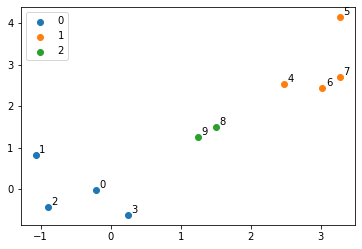

In [59]:
plot_clusters(points,kmeans.labels_,offset=0.05)

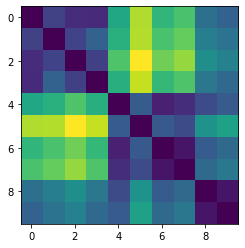

In [68]:
from sklearn.metrics.pairwise import euclidean_distances
plt.imshow(euclidean_distances(points,points))

In [159]:
def initialise_centers(points,K):
    p = np.copy(points)
    return p[np.random.choice(p.shape[0],size=K,replace=False)]

In [141]:
def assign(points,centers):
    return np.argmin(euclidean_distances(points,centers),axis=1)

In [187]:
centers = initialise_centers(points,3)

In [188]:
cluster_labels = assign(points,centers)
cluster_labels

array([0, 1, 0, 0, 2, 2, 2, 2, 2, 0])

In [189]:
def recalculate_centers(points, cluster_labels,K):
    uncluster_labels = np.unique(cluster_labels)
    new_centers = np.zeros((K,2))
    for label in uncluster_labels:
        new_centers[label] = np.mean(points[cluster_labels == label],axis = 0)
    return new_centers

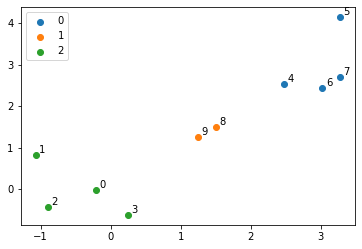

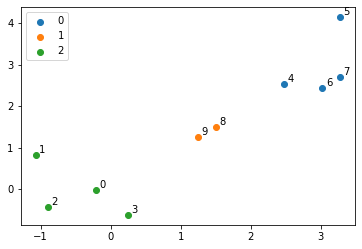

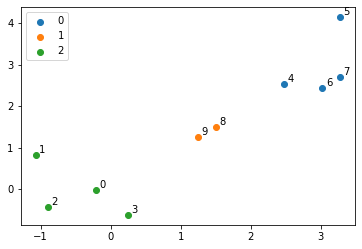

In [193]:
centers = initialise_centers(points,3)
cluster_labels = assign(points,centers)
plt.figure()
plot_clusters(points,cluster_labels,offset=0.05)
while True:
    centers_ = recalculate_centers(points,cluster_labels,centers.shape[0])
    cluster_labels = assign(points,centers)
    plt.figure()
    plot_clusters(points,cluster_labels,offset=0.05)
    if (centers_[centers_ != centers]).shape[0] == 0:
        break
    centers = centers_

In [190]:
centers

array([[-0.20837892, -0.02813341],
       [-1.06809805,  0.8201354 ],
       [ 3.26952916,  2.70192015]])

In [191]:
recalculate_centers(points,cluster_labels,centers.shape[0])

array([[ 0.099086  ,  0.04458722],
       [-1.06809805,  0.8201354 ],
       [ 2.70740995,  2.66691153]])

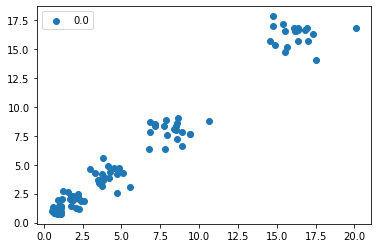

In [197]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotations=False)

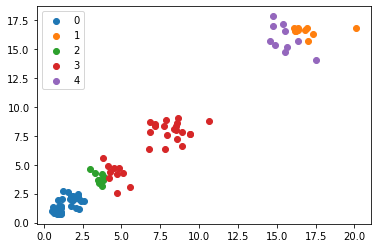

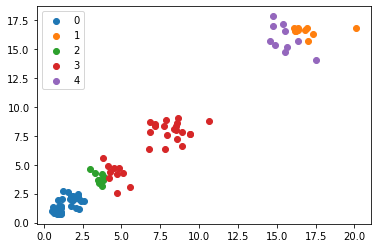

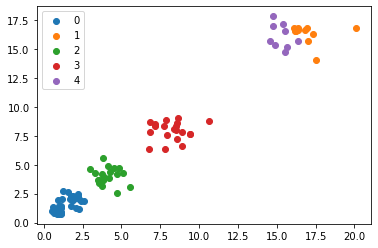

In [201]:
centers = initialise_centers(points,K)
cluster_labels = assign(points,centers)
plt.figure()
plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
while True:
    centers_ = recalculate_centers(points,cluster_labels,centers.shape[0])
    cluster_labels = assign(points,centers)
    plt.figure()
    plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
    if (centers_[centers_ != centers]).shape[0] == 0:
        break
    centers = centers_

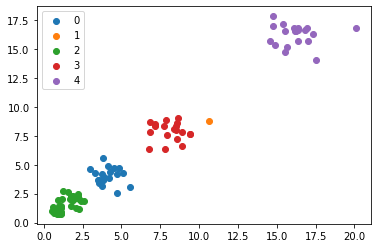

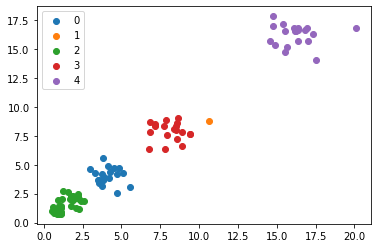

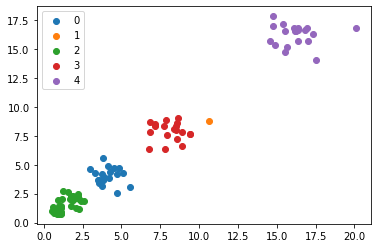

In [202]:
centers = initialise_centers(points,K)
cluster_labels = assign(points,centers)
plt.figure()
plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
while True:
    centers_ = recalculate_centers(points,cluster_labels,centers.shape[0])
    cluster_labels = assign(points,centers)
    plt.figure()
    plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
    if (centers_[centers_ != centers]).shape[0] == 0:
        break
    centers = centers_

In [208]:
from sklearn.datasets import make_circles

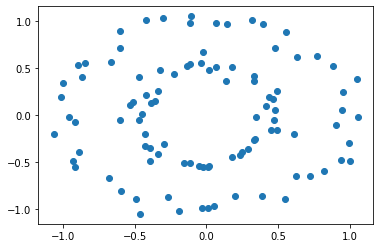

In [239]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
plt.scatter(points[:,0], points[:,1])
K = 2

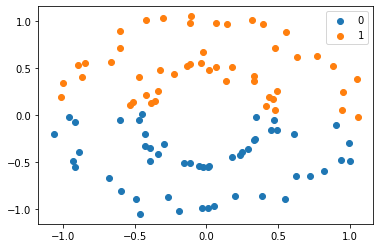

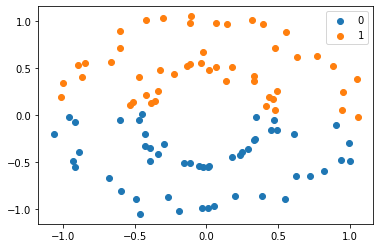

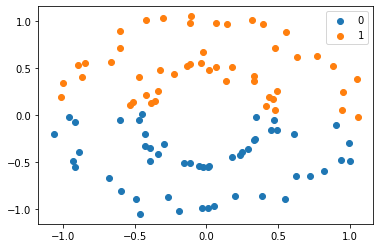

In [240]:
centers = initialise_centers(points,K)
cluster_labels = assign(points,centers)
plt.figure()
plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
while True:
    centers_ = recalculate_centers(points,cluster_labels,centers.shape[0])
    cluster_labels = assign(points,centers)
    plt.figure()
    plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
    if (centers_[centers_ != centers]).shape[0] == 0:
        break
    centers = centers_

In [241]:
r = np.sqrt(points[:,0]**2+points[:,1]**2)
t = np.arctan2(points[:,1],points[:,0])
points2 = np.copy(points)
points[:,0] = r
points[:,1] = (t)/(2*np.pi)

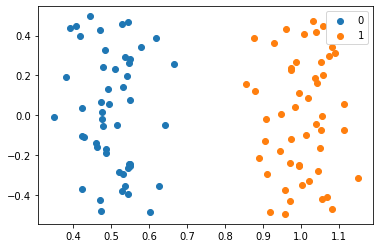

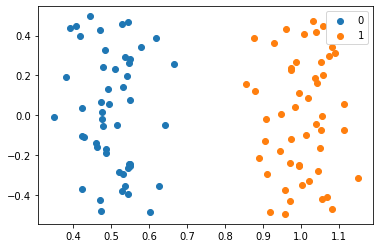

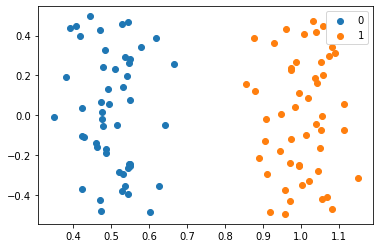

In [245]:
centers = initialise_centers(points,K)
cluster_labels = assign(points,centers)
plt.figure()
plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
while True:
    centers_ = recalculate_centers(points,cluster_labels,centers.shape[0])
    cluster_labels = assign(points,centers)
    plt.figure()
    plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
    if (centers_[centers_ != centers]).shape[0] == 0:
        break
    centers = centers_

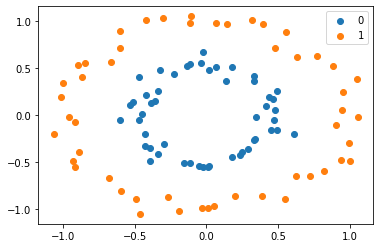

In [246]:
plot_clusters(points2,cluster_labels,offset=0.05,show_annotations=False)

In [247]:
points = np.copy(points2)

In [248]:
r = np.sqrt(points[:,0]**2+points[:,1]**2)
t = np.arctan2(points[:,1],points[:,0])
points2 = np.copy(points)
points[:,0] = r
points[:,1] = 0

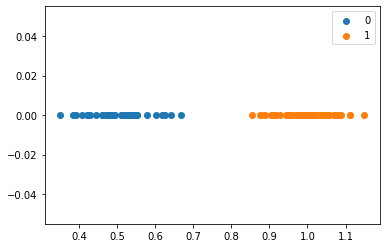

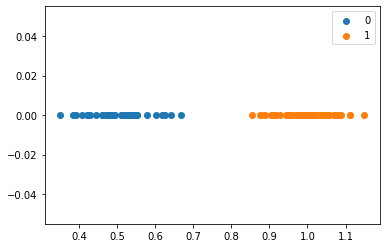

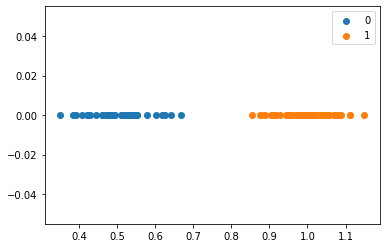

In [252]:
centers = initialise_centers(points,K)
cluster_labels = assign(points,centers)
plt.figure()
plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
while True:
    centers_ = recalculate_centers(points,cluster_labels,centers.shape[0])
    cluster_labels = assign(points,centers)
    plt.figure()
    plot_clusters(points,cluster_labels,offset=0.05,show_annotations=False)
    if (centers_[centers_ != centers]).shape[0] == 0:
        break
    centers = centers_

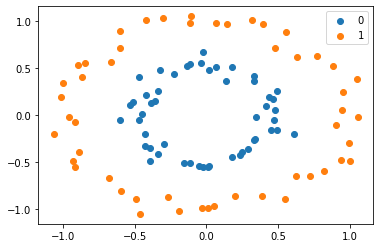

In [253]:
plot_clusters(points2,cluster_labels,offset=0.05,show_annotations=False)